<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>

Юлия, доброго дня! рад приветствовать тебя вновь) <br />
(А дальше - шаблонная часть, как ты заметил по другим спринтам)<br>
<br />
Меня зовут Николай Шавлюго. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='orange'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако есть на что обратить внимание в плане применения техник, или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху твоих знаний - свой опыт, что бы ты мог использовать его для своего дальнейшего успеха) И очень здорово будет, если тебе удастся задавать вопросы, да и вообще - всячески доставать меня, если я по каким-то причинам не приму проект:) При этом, из своего опыта скажу, хорошо и важно, когда переписка ревьюера и студента - сохраняется на следующие проекты и даже на будущую практическую деятельность.<br>
<BR> В ПУТЬ!<br>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

## Подготовка данных

In [38]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from catboost import Pool, CatBoostRegressor, cv
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.datasets import make_classification

In [39]:
df = pd.read_csv('/datasets/autos.csv')

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>ок, данные на базе)

In [40]:
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
DateCrawled          354369 non-null object
Price                354369 non-null int64
VehicleType          316879 non-null object
RegistrationYear     354369 non-null int64
Gearbox              334536 non-null object
Power                354369 non-null int64
Model                334664 non-null object
Kilometer            354369 non-null int64
RegistrationMonth    354369 non-null int64
FuelType             321474 non-null object
Brand                354369 non-null object
NotRepaired          283215 non-null object
DateCreated          354369 non-null object
NumberOfPictures     354369 non-null int64
PostalCode           354369 non-null int64
LastSeen             354369 non-null object
dtypes: int64(7), object(9)
memory usage: 43.3+ MB


In [42]:
df.isna().mean()

DateCrawled          0.000000
Price                0.000000
VehicleType          0.105794
RegistrationYear     0.000000
Gearbox              0.055967
Power                0.000000
Model                0.055606
Kilometer            0.000000
RegistrationMonth    0.000000
FuelType             0.092827
Brand                0.000000
NotRepaired          0.200791
DateCreated          0.000000
NumberOfPictures     0.000000
PostalCode           0.000000
LastSeen             0.000000
dtype: float64

В данных имеются пропущенные значения у признаков VehicleType, Gearbox, Model, FuelType, NotRepaired. Заменим пропуски на "unknown", чтобы в дальнейшем была возможность работать с такими строками.

In [43]:
df = df.fillna("unknown")

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u>
<font color='green'><br>С категориаьными факторами, т.е. пропусками в них: действиетльно, подчас непросто их заполнить. И выход - подстановка новой категории "неизвестно" ("другое") видится оправданным. Или удалить)

Обработаем дубликаты:

In [44]:
df.duplicated().sum()

4

In [45]:
df = df.drop_duplicates().reset_index(drop = True)

In [46]:
len(df.query('NumberOfPictures > 0'))

0

Удалим из набора данных признаки, которые не пригодятся для обучения моделей:

In [47]:
df = df.drop(['DateCrawled', 'RegistrationMonth', 'DateCreated', 'NumberOfPictures', 'PostalCode', 'LastSeen'], axis=1)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u>
<font color='green'><br>категорически..... согласен с дропом) Кстати говоря, фактор "PostCode" можно попробовать оставить 1-2 первые цифры от почнового кода... тогда категорий будет меньше. И для модели - уже интереснее.. Но это на будущие исследования)

Заменим типы данных на категориальные:

In [48]:
df['VehicleType'] = df['VehicleType'].astype('category')
df['Gearbox'] = df['Gearbox'].astype('category')
df['Model'] = df['Model'].astype('category')
df['FuelType'] = df['FuelType'].astype('category')
df['Brand'] = df['Brand'].astype('category')
df['NotRepaired'] = df['NotRepaired'].astype('category')

Посмотрим на общую характеристику данных:

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,354365.0,4416.679830,4514.176349,0.0,1050.0,2700.0,6400.0,20000.0
RegistrationYear,354365.0,2004.234481,90.228466,1000.0,1999.0,2003.0,2008.0,9999.0
Power,354365.0,110.093816,189.851330,0.0,69.0,105.0,143.0,20000.0
Kilometer,354365.0,128211.363989,37905.083858,5000.0,125000.0,150000.0,150000.0,150000.0


В данных имеются редкие и аномальные значения, обработаем и удалим их из выборки.

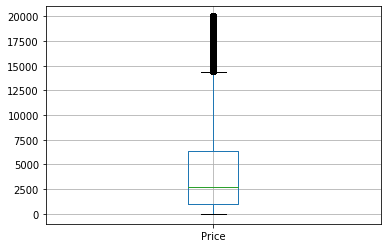

In [50]:
df.boxplot(column='Price')
plt.show()

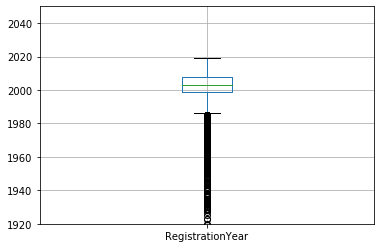

In [51]:
df.boxplot(column='RegistrationYear')
plt.ylim(1920, 2050)
plt.show()

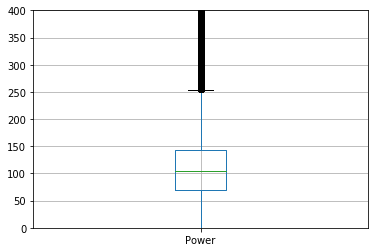

In [52]:
df.boxplot(column='Power')
plt.ylim(0, 400)
plt.show()

In [53]:
df = df.query('0<Price<=15000 & 1980<RegistrationYear<=2020 & 50<Power<=250').reset_index(drop=True)

<b>Вывод</b>

В данных обнаружены пропущенные значения, для возможности дальнейшей работы с ними пропуски заменены на "unknown". Также выявлены дублирующиеся значения, они удалены. В столбце NumberOfPictures все значения - 0, принято решение его удалить вместе с частью других признаков, не имеющих ценности для обучения моделей. Также осуществлена обработка данных от редких и аномальных значений.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u>
<font color='green'><br>ОК, хорошо. Есть такой ещё подход для работы с количественными данными: совместно со статистическим анализом проводить бизнес-анализ данных. Т.е. подключать понимание рынка и на этом понимании устанавливать отсечки. И также,оставлять ссылки на источник знаний по границам отсечек, чтобы это не выглядело, будто бы решение принимал аналитик исключительно от себя)<br>
    
    
Такой ещё момент по регистрации: последняя дата регистрации на сайте - 2016 год. Значит всё что больше 2016 - аномалии..т.е. отсечку лучше делать не 2020, а 2016 в данном случае...<br>

## Обучение моделей

Преобразуем категориальные признаки в численные методом OHE:

In [54]:
df_ohe = pd.get_dummies(df, drop_first=True)

<div class="alert alert-block alert-info">Преобразуем категориальные признаки в численные методом OE:</div>

In [55]:
initial_features = df.drop('Price', axis=1)

encoder = OrdinalEncoder()
category_columns = ['VehicleType', 'Gearbox', 'FuelType', 'Brand', 'Model', 'NotRepaired']
category_features = initial_features[category_columns]
category_features = pd.DataFrame(encoder.fit_transform(category_features),
                                columns=category_features.columns, 
                                index=category_features.index)
ordinal_features = initial_features.copy()
for column in category_columns:
    ordinal_features[column] = category_features[column]

<div style="background: #ffeeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u>
<font color='green'><br>ОК)<br>
Единствкенное -вот что: из-за таких факторов, как модель и бренд - слишком много категорий - получается много столбцов для работы. Поэтому, в таких случаях лучше использовать ordinal-категоризацию. В этом проекте как раз задумано поиспользовать этот подход) Будет здорово, если попробуешь! (категоризируем ТОЛЬКО категориальные стобцы, числовые исключаем)

Разобъем данные на выборки, используя датафрейм, преобразованный методом ОНЕ:

In [56]:
target = df_ohe['Price']
features = df_ohe.drop('Price', axis=1)

In [57]:
features_train, features_valid, target_train, target_valid = train_test_split(features, 
                                                                              target, 
                                                                              train_size=0.75, 
                                                                              test_size=0.25, 
                                                                              random_state=12345)

In [58]:
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, 
                                                                            target_valid, 
                                                                            train_size=0.50, 
                                                                            test_size=0.50, 
                                                                            random_state=12345)

In [59]:
print(features_train.shape, features_valid.shape, features_test.shape)

(206835, 311) (34473, 311) (34473, 311)


<div class="alert alert-block alert-info">Разобъем данные, преобразованный методом ОЕ, на выборки:</div>

In [60]:
ordinal_target = df['Price']
initial_features_train, initial_features_valid, initial_target_train, initial_target_valid = train_test_split(initial_features, 
                                                                              ordinal_target, 
                                                                              train_size=0.75, 
                                                                              test_size=0.25, 
                                                                              random_state=12345)

initial_features_valid, initial_features_test, initial_target_valid, initial_target_test = train_test_split(initial_features_valid, 
                                                                              initial_target_valid, 
                                                                              train_size=0.5, 
                                                                              test_size=0.5, 
                                                                              random_state=12345)

ordinal_features_train = ordinal_features.loc[initial_features_train.index, :]
ordinal_features_valid = ordinal_features.loc[initial_features_valid.index, :]
ordinal_features_test = ordinal_features.loc[initial_features_test.index, :]

Масштабируем признаки:

In [61]:
numeric = ['RegistrationYear', 'Power', 'Kilometer']
scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [62]:
result = []
result_oe = []

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u>
<font color='green'><br>ок, раздельно)

<b>Модель градиентного бустинга c помощью библиотеки LightGBM (ОНЕ)</b>

In [63]:
parameters = {'boosting_type': 'gbdt', 
              'max_depth': 11, 
              'n_estimators': 120, 
              'random_state': 123}

model_lgbm = LGBMRegressor(**parameters)

start_fit = time.time()
model_lgbm.fit(features_train, target_train)
end_fit = time.time() - start_fit

start_predict = time.time()
predict_lgbm = model_lgbm.predict(features_valid, verbose=2)
end_predict = time.time() - start_predict

RMSE = mean_squared_error(target_valid, predict_lgbm)**0.5

result.append({'Модель': 'LGBMRegressor', 
               'Параметры': parameters,
               'Время обучения': end_fit, 
               'Скорость предсказания': end_predict,
               'RMSE': RMSE})

<b><div class="alert alert-block alert-info">Модель градиентного бустинга c помощью библиотеки LightGBM (ОЕ)</div></b>

In [64]:
parameters = {'boosting_type': 'gbdt', 
              'max_depth': 11, 
              'n_estimators': 120, 
              'random_state': 123}

model_lgbm_oe = LGBMRegressor(**parameters)

start_fit = time.time()
model_lgbm_oe.fit(ordinal_features_train, initial_target_train)
end_fit = time.time() - start_fit

start_predict = time.time()
predict_lgbm_oe = model_lgbm_oe.predict(ordinal_features_valid, verbose=2)
end_predict = time.time() - start_predict

RMSE = mean_squared_error(initial_target_valid, predict_lgbm_oe)**0.5

result_oe.append({'Модель': 'LGBMRegressor', 
               'Параметры': parameters,
               'Время обучения': end_fit, 
               'Скорость предсказания': end_predict,
               'RMSE': RMSE})

<b>Модель градиентного бустинга c помощью библиотеки CatBoost (OHE)</b>

In [65]:
for iteration in range(10, 101, 20):    
    for depth in range(5, 11, 2):    
        model_cbr = CatBoostRegressor(random_state=12345, iterations=iteration, loss_function='RMSE', depth=depth)
        
        start_fit = time.time()
        model_cbr.fit(features_train, target_train)
        end_fit = time.time() - start_fit
        
        start_predict = time.time()
        predict_cbr = model_cbr.predict(features_valid, verbose=1)
        end_predict = time.time() - start_predict
        
        RMSE = mean_squared_error(target_valid, predict_cbr)**0.5
        
        result.append({'Модель': 'CatBoostRegressor', 
                       'Параметры': {'random_state':12345, 
                                    'iterations': iteration, 
                                    'loss_function': 'RMSE', 
                                    'depth': depth},
                       'Время обучения': end_fit, 
                       'Скорость предсказания': end_predict,
                       'RMSE': RMSE})

0:	learn: 3587.6410377	total: 43.4ms	remaining: 391ms
1:	learn: 3524.7237548	total: 148ms	remaining: 591ms
2:	learn: 3465.5642645	total: 340ms	remaining: 793ms
3:	learn: 3405.3678893	total: 443ms	remaining: 665ms
4:	learn: 3350.7787811	total: 548ms	remaining: 548ms
5:	learn: 3296.6744065	total: 737ms	remaining: 491ms
6:	learn: 3242.2274797	total: 840ms	remaining: 360ms
7:	learn: 3190.0301067	total: 943ms	remaining: 236ms
8:	learn: 3140.4248233	total: 1.05s	remaining: 117ms
9:	learn: 3090.4625963	total: 1.24s	remaining: 0us
0:	learn: 3580.4263886	total: 102ms	remaining: 918ms
1:	learn: 3511.1518407	total: 295ms	remaining: 1.18s
2:	learn: 3444.2088733	total: 491ms	remaining: 1.15s
3:	learn: 3377.9552412	total: 598ms	remaining: 897ms
4:	learn: 3315.6273701	total: 792ms	remaining: 792ms
5:	learn: 3256.3648056	total: 989ms	remaining: 659ms
6:	learn: 3198.6589014	total: 1.1s	remaining: 471ms
7:	learn: 3144.4697634	total: 1.29s	remaining: 323ms
8:	learn: 3090.4556221	total: 1.49s	remaining: 1

<b><div class="alert alert-block alert-info">Модель градиентного бустинга c помощью библиотеки CatBoost (ОЕ)</div></b>

In [66]:
for iteration in range(10, 101, 20):    
    for depth in range(5, 11, 2):    
        model_cbr = CatBoostRegressor(random_state=12345, iterations=iteration, loss_function='RMSE', depth=depth)
        
        start_fit = time.time()
        model_cbr.fit(ordinal_features_train, initial_target_train)
        end_fit = time.time() - start_fit
        
        start_predict = time.time()
        predict_cbr = model_cbr.predict(ordinal_features_valid, verbose=1)
        end_predict = time.time() - start_predict
        
        RMSE = mean_squared_error(initial_target_valid, predict_cbr)**0.5
        
        result_oe.append({'Модель': 'CatBoostRegressor', 
                       'Параметры': {'random_state':12345, 
                                    'iterations': iteration, 
                                    'loss_function': 'RMSE', 
                                    'depth': depth},
                       'Время обучения': end_fit, 
                       'Скорость предсказания': end_predict,
                       'RMSE': RMSE})

0:	learn: 3586.7914552	total: 21.9ms	remaining: 197ms
1:	learn: 3524.3960524	total: 125ms	remaining: 501ms
2:	learn: 3464.7642157	total: 316ms	remaining: 738ms
3:	learn: 3405.7912078	total: 423ms	remaining: 634ms
4:	learn: 3347.1544184	total: 526ms	remaining: 526ms
5:	learn: 3291.4684184	total: 714ms	remaining: 476ms
6:	learn: 3238.2853509	total: 820ms	remaining: 351ms
7:	learn: 3189.0376916	total: 921ms	remaining: 230ms
8:	learn: 3139.9299503	total: 1.11s	remaining: 124ms
9:	learn: 3090.4077748	total: 1.22s	remaining: 0us
0:	learn: 3579.6930403	total: 102ms	remaining: 922ms
1:	learn: 3511.6732497	total: 296ms	remaining: 1.18s
2:	learn: 3444.4046254	total: 404ms	remaining: 943ms
3:	learn: 3379.6764269	total: 601ms	remaining: 901ms
4:	learn: 3318.8621043	total: 795ms	remaining: 795ms
5:	learn: 3259.7962987	total: 991ms	remaining: 661ms
6:	learn: 3202.8116344	total: 1.1s	remaining: 471ms
7:	learn: 3148.3416968	total: 1.3s	remaining: 324ms
8:	learn: 3093.1908243	total: 1.49s	remaining: 16

<b>Модель линейной регрессии (OHE)</b>

In [67]:
model_lr = LinearRegression()

start_fit = time.time()
model_lr.fit(features_train, target_train)
end_fit = time.time() - start_fit

start_predict = time.time()
predict_lr = model_lr.predict(features_valid)
end_predict = time.time() - start_predict

RMSE = mean_squared_error(target_valid, predict_lr)**0.5

result.append({'Модель': 'LinearRegression',
               'Время обучения': end_fit, 
               'Скорость предсказания': end_predict,
               'RMSE': RMSE})

<b><div class="alert alert-block alert-info">Модель линейной регрессии (OE)</div></b>

In [68]:
model_lr_oe = LinearRegression()

start_fit = time.time()
model_lr_oe.fit(ordinal_features_train, initial_target_train)
end_fit = time.time() - start_fit

start_predict = time.time()
predict_lr_oe = model_lr_oe.predict(ordinal_features_valid)
end_predict = time.time() - start_predict

RMSE = mean_squared_error(initial_target_valid, predict_lr_oe)**0.5

result_oe.append({'Модель': 'LinearRegression',
               'Время обучения': end_fit, 
               'Скорость предсказания': end_predict,
               'RMSE': RMSE})

<b>Модель дерево решений</b>

In [69]:
for depth in range(1, 11):
    model_dtr = DecisionTreeRegressor(random_state = 12345, max_depth=depth)
    
    start_fit = time.time()
    model_dtr.fit(features_train, target_train)
    end_fit = time.time() - start_fit
    
    start_predict = time.time()
    predict_dtr = model_dtr.predict(features_valid)
    end_predict = time.time() - start_predict
    
    RMSE = mean_squared_error(target_valid, predict_dtr)**0.5
    
    result.append({'Модель': 'DecisionTreeRegressor',
                   'Параметры': {'random_state':12345,
                                'max_depth': depth},
                   'Время обучения': end_fit, 
                   'Скорость предсказания': end_predict,
                   'RMSE': RMSE})

<b><div class="alert alert-block alert-info">Модель дерево решений (OE)</div></b>

In [70]:
for depth in range(1, 11):
    model_dtr = DecisionTreeRegressor(random_state = 12345, max_depth=depth)
    
    start_fit = time.time()
    model_dtr.fit(ordinal_features_train, initial_target_train)
    end_fit = time.time() - start_fit
    
    start_predict = time.time()
    predict_dtr = model_dtr.predict(ordinal_features_valid)
    end_predict = time.time() - start_predict
    
    RMSE = mean_squared_error(initial_target_valid, predict_dtr)**0.5
    
    result_oe.append({'Модель': 'DecisionTreeRegressor',
                      'Параметры': {'random_state':12345,
                                'max_depth': depth},
                      'Время обучения': end_fit, 
                      'Скорость предсказания': end_predict,
                      'RMSE': RMSE})

## Анализ моделей

In [71]:
pd.DataFrame(result)

,Модель,Параметры,Время обучения,Скорость предсказания,RMSE
0,LGBMRegressor,"{'boosting_type': 'gbdt', 'max_depth': 11, 'n_...",11.073287,0.793973,1383.766761
1,CatBoostRegressor,"{'random_state': 12345, 'iterations': 10, 'los...",7.211078,0.026066,3058.278537
2,CatBoostRegressor,"{'random_state': 12345, 'iterations': 10, 'los...",7.608661,0.014722,3006.463872
3,CatBoostRegressor,"{'random_state': 12345, 'iterations': 10, 'los...",8.221301,0.010449,2973.226031
4,CatBoostRegressor,"{'random_state': 12345, 'iterations': 30, 'los...",13.120631,0.010444,2390.691162
5,CatBoostRegressor,"{'random_state': 12345, 'iterations': 30, 'los...",11.262073,0.010237,2292.696949
6,CatBoostRegressor,"{'random_state': 12345, 'iterations': 30, 'los...",12.504162,0.012418,2224.773126
7,CatBoostRegressor,"{'random_state': 12345, 'iterations': 50, 'los...",12.853894,0.011242,2064.404507
8,CatBoostRegressor,"{'random_state': 12345, 'iterations': 50, 'los...",14.620216,0.010892,1959.196247
9,CatBoostRegressor,"{'random_state': 12345, 'iterations': 50, 'los...",16.526826,0.011873,1883.503335


In [72]:
pd.DataFrame(result_oe)

,Модель,Параметры,Время обучения,Скорость предсказания,RMSE
0,LGBMRegressor,"{'boosting_type': 'gbdt', 'max_depth': 11, 'n_...",7.896254,0.495066,1387.075314
1,CatBoostRegressor,"{'random_state': 12345, 'iterations': 10, 'los...",3.098423,0.004469,3057.937515
2,CatBoostRegressor,"{'random_state': 12345, 'iterations': 10, 'los...",3.448573,0.008924,3009.593251
3,CatBoostRegressor,"{'random_state': 12345, 'iterations': 10, 'los...",3.681421,0.013613,2976.979697
4,CatBoostRegressor,"{'random_state': 12345, 'iterations': 30, 'los...",5.710752,0.016168,2392.357436
5,CatBoostRegressor,"{'random_state': 12345, 'iterations': 30, 'los...",6.681250,0.004035,2294.371217
6,CatBoostRegressor,"{'random_state': 12345, 'iterations': 30, 'los...",7.991426,0.012159,2226.775626
7,CatBoostRegressor,"{'random_state': 12345, 'iterations': 50, 'los...",8.616041,0.011887,2065.048521
8,CatBoostRegressor,"{'random_state': 12345, 'iterations': 50, 'los...",11.287083,0.011621,1955.617260
9,CatBoostRegressor,"{'random_state': 12345, 'iterations': 50, 'los...",12.768486,0.006558,1878.434344


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u>
<font color='green'><br>дааааааа, солидно вышло)

Наилучшее качество предсказания показала модель градиентного бустинга с помощью библиотеки LightGBM, но у данной модели достаточно большые время обучения и скорость предсказания, что не соответствует требованиям заказчика. Самую высокую скорость показала модель дерева решений при глубине 1, но качество предсказаний данной модели достаточно низкое. На мой взгляд, наиболее оптимальной критериям заказчика является модель дерева решений при глубине 10, проверим ее на тестовой выборке.

<div class="alert alert-block alert-info">RMSE модели Дерево решений, обученной на ОЕ данных, при той же глубине (10) несколько лучше, чем аналогичная модель на ОНЕ данных, протестируем ее:<div>

In [73]:
model_optimal = DecisionTreeRegressor(random_state = 12345, max_depth=10)

start_fit = time.time()
model_optimal.fit(ordinal_features_train, initial_target_train)
end_fit = time.time() - start_fit

start_predict = time.time()
predict_optimal = model_optimal.predict(ordinal_features_test)
end_predict = time.time() - start_predict

print('RMSE: ', mean_squared_error(initial_target_test, predict_optimal)**0.5)
print('Время обучения: ', end_fit)
print('Скорость предсказания: ', end_predict)

RMSE:  1666.5948649507475
Время обучения:  0.4957261085510254
Скорость предсказания:  0.00659942626953125


<div class="alert alert-block alert-info">Проанализируем важность факторов, влияющих на построение предсказаний моделью:<div>

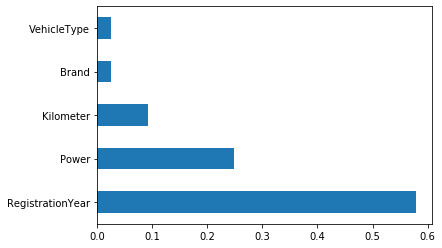

In [74]:
pd.Series(model_optimal.feature_importances_, index=ordinal_features_train.columns).nlargest(5).plot(kind='barh')
plt.show()

Из полученного графика видим, что на предсказание стоимости автомобиля более всего оказывает влияние такой признак как год регистрации автомобиля, далее идут мощность и пробег авто.

<b>Вывод</b>

Соответствующей трем показателям (качество предсказания, скорость предсказания и время обучения) выбрана модель дерева решений с глубиной равной 10.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
<font color='green'><br>
Привет, Юлия!<br>
Классная доработка. И категоризацией и с важностью факторов.<br>
В общем-то, всё в точку)<br>
Спасибо за проект) УСПЕШНОГО ДАЛЬНЕЙШЕГО ОБУЧЕНИЯ!


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
<br/>Юлия, крепкая работа<br>
Прочитав её до конца хочется добавить: ..."А по сему и делу конец), как говорится" <br>
Мне было интерено двигаться от блока к блоку, читать размышления, код и выводы.<br>
При этом оформление выводов такое же последовательное и адекватное.<br>
В целом, ты не забыла поисследовать данные, и достаточно разносторонне поработать с моделями.<br>
    
<font color='green'>
Если говорить, что можно ещё улучшить в подобных проектах, то я бы выделили такие моменты:<br>
1) После подбора параметров модели, когда уже настаёт этап тестировани. Можно обучить на обобщённой выборке (трайн + валидация) ну и тестировать потом. Это может ещё прибавить точности.(если не использовать кросс-валидации)<br>
    
2) Для понимания, а какие в итоге факторы важны при моделировании, можно выводить их важность, использую feature_importances_, ну и график заодно. Это будет смотреться очнь здорово: результативная метрика и график важности факторов)))<br>  
    
3) предварительная работа с данными:<br>
- На этом этапе нужно БОЛЬШЕ аргументации, для принимаемых решений.<br>
- Также, можно организовать для себя некую систему работы с данными:<br>
 
Например, алгоритм такой может:<br>
а) анализ аномалий: количественные и категориальные переменные <br>
б) анализ пропусков: количественные и категориальные переменные<br>
в) проверка дубликатов<br>
г) Анализ факторов: исходя из типа шкалы, могут применять следующие графический и аналитический анализы:<br>
- колличественная-колличественная: аналитически методод - корреляции, графический - скатерплот.<br>
- колличественная-номинальная: аналитически методод - проверка гипотез (стьюдент, маннауитни), графический - боксплот.<br>
- номинальная-номинальная: аналитически методод - Хи-квадрат, графический - круговая диаграмма<br>
    
4) Можно попробовать провести анализ остатков. Вычислить разницу между прогноз-факт и посмотерть что и как можедель чаще всего хорошо/плохо предсказывает.<br>
5) У нас разный возраст машин. Есть гипотеза, что для разных возрастов - своё ценообразование. Поэтому, можно попробовать ввести фактор "тип возраста" (ретро, суперретро, старая, новаоя... надо пдумать..) ну и попробовать новую модель (этопросто на обчуждение). А может, по каждому кластеру - вообще своя модель...<br>
    
    
<font color='red'>
Что ещё лучше сделать в этой работе:<br>
1) Лучше попробовать ещё ordinal_категоризацию и сравнить результат с текущим подходом.<br>
2) Очень здорово будет, если найдёшь возможность сделать график важности факторов. Это необходимая вещь для финалной части любой модельной работы.<br>
<font color='green'>    
<br>
Спасибо) БУДУ ЖДАТЬ КОММЕНТАРИЕВ!

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей